In [24]:
import fastf1 as ff1
import pandas as pd

In [2]:
ff1.Cache.enable_cache('cache') 

In [3]:
session = ff1.get_session(2023,'Australia', 'R')

In [4]:
session.event

RoundNumber                                                   3
Country                                               Australia
Location                                              Melbourne
OfficialEventName    FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023
EventDate                                   2023-04-02 17:00:00
EventName                                 Australian Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2023-03-31 12:30:00
Session2                                             Practice 2
Session2Date                                2023-03-31 16:00:00
Session3                                             Practice 3
Session3Date                                2023-04-01 12:30:00
Session4                                             Qualifying
Session4Date                                2023-04-01 16:00:00
Session5                                

In [ ]:
session.load()

In [6]:
session.laps[(session.laps['Driver']=='VER')&(session.laps['LapNumber']==4)]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
3,0 days 01:09:44.885000,1,0 days 00:01:23.391000,4.0,NaT,NaT,0 days 00:00:28.900000,0 days 00:00:18.326000,0 days 00:00:36.165000,0 days 01:08:50.394000,...,MEDIUM,4.0,True,1,0 days 01:08:21.494000,Red Bull Racing,VER,1,False,2023-04-02 05:09:23.316


In [7]:
session.laps['Driver'].unique()

array(['VER', 'HAM', 'ALO', 'STR', 'PER', 'NOR', 'HUL', 'PIA', 'ZHO',
       'TSU', 'BOT', 'SAI', 'GAS', 'OCO', 'DEV', 'SAR', 'MAG', 'RUS',
       'ALB', 'LEC'], dtype=object)

In [12]:
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import fastf1.plotting
ff1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Australia', 'R')
session.load()

In [76]:
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

In [77]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

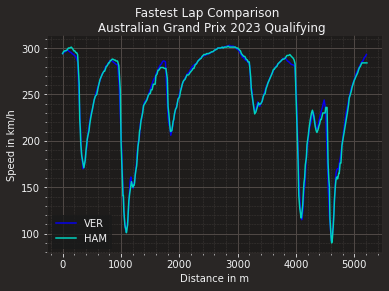

In [78]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [79]:
session.laps[session.laps['Driver']=='HAM']['Stint']

58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
111    2
112    2
113    3
114    3
115    4
Name: Stint, dtype: int64

In [80]:
a=session.laps['Driver'].unique()

In [81]:
session.get_driver('HAM')

DriverNumber                         44
BroadcastName                L HAMILTON
Abbreviation                        HAM
TeamName                       Mercedes
TeamColor                        6CD3BF
FirstName                         Lewis
LastName                       Hamilton
FullName                 Lewis Hamilton
Position                            2.0
GridPosition                        3.0
Q1                                  NaT
Q2                                  NaT
Q3                                  NaT
Time             0 days 02:32:38.550000
Status                         Finished
Points                             18.0
Name: Lewis, dtype: object

In [82]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 02:32:38.371000,Finished,25.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,2.0,3.0,NaT,NaT,NaT,0 days 02:32:38.550000,Finished,18.0
14,14,F ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,Fernando Alonso,3.0,4.0,NaT,NaT,NaT,0 days 02:32:39.140000,Finished,15.0
18,18,L STROLL,STR,Aston Martin,358C75,Lance,Stroll,Lance Stroll,4.0,6.0,NaT,NaT,NaT,0 days 02:32:41.453000,Finished,12.0
11,11,S PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,Sergio Perez,5.0,0.0,NaT,NaT,NaT,0 days 02:32:41.691000,Finished,11.0
4,4,L NORRIS,NOR,McLaren,F58020,Lando,Norris,Lando Norris,6.0,13.0,NaT,NaT,NaT,0 days 02:32:42.072000,Finished,8.0
27,27,N HULKENBERG,HUL,Haas F1 Team,B6BABD,Nico,Hulkenberg,Nico Hulkenberg,7.0,10.0,NaT,NaT,NaT,0 days 02:32:43.310000,Finished,6.0
81,81,O PIASTRI,PIA,McLaren,F58020,Oscar,Piastri,Oscar Piastri,8.0,16.0,NaT,NaT,NaT,0 days 02:32:43.753000,Finished,4.0
24,24,G ZHOU,ZHO,Alfa Romeo,C92D4B,Guanyu,Zhou,Guanyu Zhou,9.0,17.0,NaT,NaT,NaT,0 days 02:32:44.084000,Finished,2.0
22,22,Y TSUNODA,TSU,AlphaTauri,5E8FAA,Yuki,Tsunoda,Yuki Tsunoda,10.0,12.0,NaT,NaT,NaT,0 days 02:32:44.423000,Finished,1.0


In [99]:
a=session.results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position']]
a
print("The winner is {}".format(a[a['Position']==1]['BroadcastName']))

The winner is 1    M VERSTAPPEN
Name: BroadcastName, dtype: object


In [106]:
a['BroadcastName'][a['Position']==1]

1    M VERSTAPPEN
Name: BroadcastName, dtype: object

In [17]:
f=[]
for i in a:
    b=session.get_driver(i)['FirstName']
    c=session.get_driver(i)['LastName']
    d=session.get_driver(i)['FullName']
    f.append(f"'{b}':'{i}'")
    print(f"'{b}':'{i}'")
    f.append(f"'{c}':'{i}'")
    print(f"'{c}':'{i}'")
    f.append(f"'{d}':'{i}'")
    print(f"'{d}':'{i}'")

'Max':'VER'
'Verstappen':'VER'
'Max Verstappen':'VER'
'George':'RUS'
'Russell':'RUS'
'George Russell':'RUS'
'Lewis':'HAM'
'Hamilton':'HAM'
'Lewis Hamilton':'HAM'
'Fernando':'ALO'
'Alonso':'ALO'
'Fernando Alonso':'ALO'
'Carlos':'SAI'
'Sainz':'SAI'
'Carlos Sainz':'SAI'
'Lance':'STR'
'Stroll':'STR'
'Lance Stroll':'STR'
'Charles':'LEC'
'Leclerc':'LEC'
'Charles Leclerc':'LEC'
'Alexander':'ALB'
'Albon':'ALB'
'Alexander Albon':'ALB'
'Pierre':'GAS'
'Gasly':'GAS'
'Pierre Gasly':'GAS'
'Nico':'HUL'
'Hulkenberg':'HUL'
'Nico Hulkenberg':'HUL'
'Esteban':'OCO'
'Ocon':'OCO'
'Esteban Ocon':'OCO'
'Yuki':'TSU'
'Tsunoda':'TSU'
'Yuki Tsunoda':'TSU'
'Lando':'NOR'
'Norris':'NOR'
'Lando Norris':'NOR'
'Kevin':'MAG'
'Magnussen':'MAG'
'Kevin Magnussen':'MAG'
'Nyck':'DEV'
'De Vries':'DEV'
'Nyck De Vries':'DEV'
'Oscar':'PIA'
'Piastri':'PIA'
'Oscar Piastri':'PIA'
'Guanyu':'ZHO'
'Zhou':'ZHO'
'Guanyu Zhou':'ZHO'
'Logan':'SAR'
'Sargeant':'SAR'
'Logan Sargeant':'SAR'
'Valtteri':'BOT'
'Bottas':'BOT'
'Valtteri Bottas':'B

In [8]:
f1dic={'Max':'VER',
'Verstappen':'VER',
'Max Verstappen':'VER',
'George':'RUS',
'Russell':'RUS',
'George Russell':'RUS',
'Lewis':'HAM',
'Hamilton':'HAM',
'Lewis Hamilton':'HAM',
'Fernando':'ALO',
'Alonso':'ALO',
'Fernando Alonso':'ALO',
'Carlos':'SAI',
'Sainz':'SAI',
'Carlos Sainz':'SAI',
'Lance':'STR',
'Stroll':'STR',
'Lance Stroll':'STR',
'Charles':'LEC',
'Leclerc':'LEC',
'Charles Leclerc':'LEC',
'Alexander':'ALB',
'Albon':'ALB',
'Alexander Albon':'ALB',
'Pierre':'GAS',
'Gasly':'GAS',
'Pierre Gasly':'GAS',
'Nico':'HUL',
'Hulkenberg':'HUL',
'Nico Hulkenberg':'HUL',
'Esteban':'OCO',
'Ocon':'OCO',
'Esteban Ocon':'OCO',
'Yuki':'TSU',
'Tsunoda':'TSU',
'Yuki Tsunoda':'TSU',
'Lando':'NOR',
'Norris':'NOR',
'Lando Norris':'NOR',
'Kevin':'MAG',
'Magnussen':'MAG',
'Kevin Magnussen':'MAG',
'Nyck':'DEV',
'De Vries':'DEV',
'Nyck De Vries':'DEV',
'Oscar':'PIA',
'Piastri':'PIA',
'Oscar Piastri':'PIA',
'Guanyu':'ZHO',
'Zhou':'ZHO',
'Guanyu Zhou':'ZHO',
'Logan':'SAR',
'Sargeant':'SAR',
'Logan Sargeant':'SAR',
'Valtteri':'BOT',
'Bottas':'BOT',
'Valtteri Bottas':'BOT',
'Sergio':'PER',
'Perez':'PER',
'Sergio Perez':'PER'}

In [9]:
name=input('Enter the name of driver ')
for i in f1dic:
    if name.lower()==i.lower():
        drivername=f1dic[str(i)]
print(drivername)
session.get_driver(drivername)

Enter the name of driver Hamilton
HAM


DriverNumber                         44
BroadcastName                L HAMILTON
Abbreviation                        HAM
TeamName                       Mercedes
TeamColor                        6CD3BF
FirstName                         Lewis
LastName                       Hamilton
FullName                 Lewis Hamilton
Position                            2.0
GridPosition                        3.0
Q1                                  NaT
Q2                                  NaT
Q3                                  NaT
Time             0 days 02:32:38.550000
Status                         Finished
Points                             18.0
Name: Lewis, dtype: object

In [19]:
fastest=input('To find out fastest lap of the driver ')
for i in f1dic:
    if fastest.lower()==i.lower():
        drivername=f1dic[str(i)]
        best_lap=session.laps.pick_driver(drivername).pick_fastest()

print('Fastest lap of the particular driver is',best_lap)

To find out fastest lap of the driver Hamilton
Fastest lap of the particular driver is Time                      0 days 02:31:18.114000
DriverNumber                                  44
LapTime                   0 days 00:01:20.613000
LapNumber                                   49.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:27.911000
Sector2Time               0 days 00:00:18.141000
Sector3Time               0 days 00:00:34.561000
Sector1SessionTime        0 days 02:30:25.412000
Sector2SessionTime        0 days 02:30:43.553000
Sector3SessionTime        0 days 02:31:18.114000
SpeedI1                                    278.0
SpeedI2                                    288.0
SpeedFL                                    291.0
SpeedST                                    295.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                       

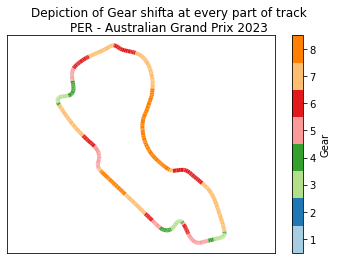

In [22]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Depiction of Gear shifta at every part of track\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


In [35]:
laps=session.laps

In [32]:
drivers = session.drivers
print(drivers)

['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']


In [33]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'HAM', 'ALO', 'STR', 'PER', 'NOR', 'HUL', 'PIA', 'ZHO', 'TSU', 'BOT', 'SAI', 'GAS', 'OCO', 'DEV', 'SAR', 'MAG', 'RUS', 'ALB', 'LEC']


In [36]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [37]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB      1   MEDIUM            7
1     ALO      1   MEDIUM            8
2     ALO      2     HARD           47
3     ALO      3     SOFT            2
4     ALO      4     SOFT            1
..    ...    ...      ...          ...
80    ZHO      2     HARD            7
81    ZHO      3     HARD           46
82    ZHO      4     SOFT            1
83    ZHO      5     SOFT            2
84    ZHO      6     SOFT            1

[85 rows x 4 columns]


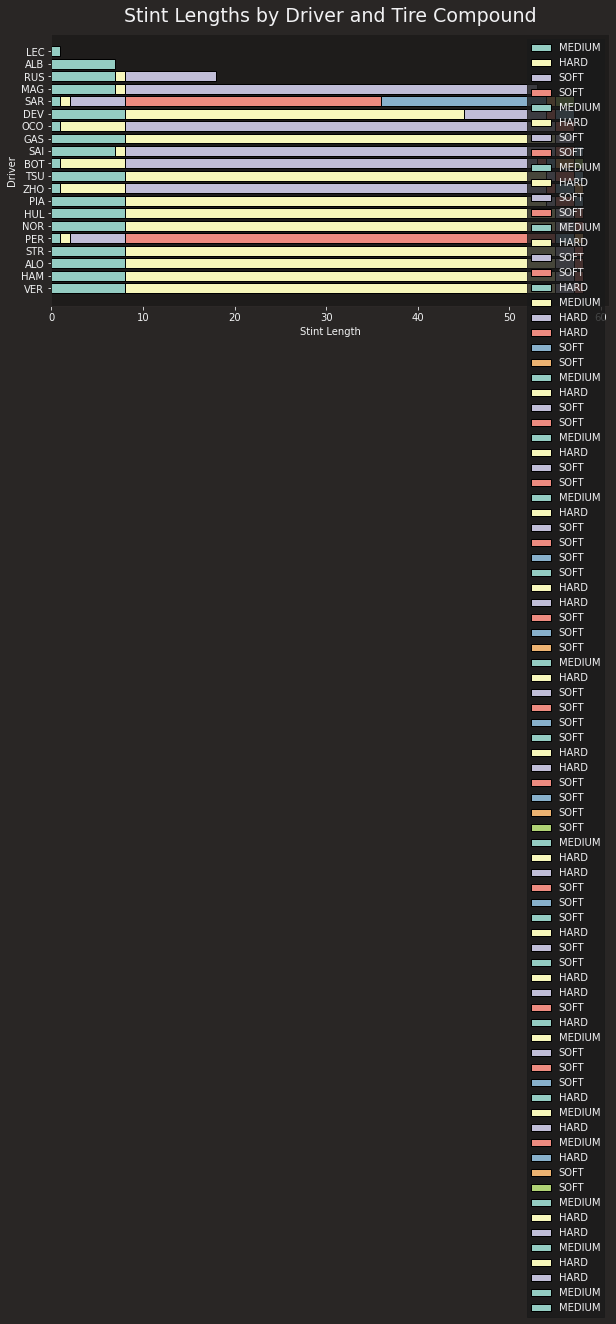

In [44]:
import matplotlib.pyplot as plt
import fastf1
import seaborn as sns

cmap = sns.color_palette("Set3", desat=0.8)

fig, ax = plt.subplots(figsize=(10, 5)) 

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        compound = row["Compound"]

        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=cmap[driver_stints.index.get_loc(idx) % len(cmap)],  
            edgecolor="black",
            label=compound,  
        )

        previous_stint_end += row["StintLength"]

ax.set_xlabel('Stint Length')
ax.set_ylabel('Driver')
ax.set_title('Stint Lengths by Driver and Tire Compound')
ax.legend(loc='upper right') 

plt.show()